# Can this file be deleted??

# Try to receive features for the same location as a single buoy!

First Station from NDBC as example:
Station ID: 41117
Coordinates: 30.000 N 81.080 W (29°59'59" N 81°4'48" W)

In [1]:
import cdsapi
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

import sys
import os
dir_root =os.path.abspath(os.path.join(os.getcwd(), os.path.pardir))
sys.path.append(dir_root+"/NDBC_Buoy_Data")

import myLibrary as mL

import netCDF4 as nc

# Download data

In [2]:
api_keyfile = open(".cdsapirc", "r")
lines = api_keyfile.readlines()
url = lines[0].rstrip().replace("url: ", "")
key = lines[1].rstrip().replace("key: ", "")

In [3]:
COORDS = {
        "PerdidoKey": [30, -87]*2,
        #"Location_2":[-34.822, -58.536]   # randomly chosen lat lon
        }

COORDS["PerdidoKey"] #41117

[30, -87, 30, -87]

In [40]:
# https://stackoverflow.com/questions/65186216/how-to-download-era5-data-for-specific-location-via-python

c = cdsapi.Client(url, key)

for station in COORDS:
    # coords = COORDS[station]
    # station_point_coord = [coords[0]+1, coords[1]+1, coords[0]-1, coords[1]-1]    #area around buoy
    # station_point_coord = COORDS["41117"]
    c.retrieve(
      'reanalysis-era5-single-levels',
      {
          'product_type': 'reanalysis',
          'variable': 'sea_surface_temperature',
          'year': '2022',
          'month': [
            '01', '02', '03', '04', '05', '06',
            '07', '08', '09', '10', '11', '12',
        ],
          'day': [
              '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
              '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
          ],
          'time': [
              '00:00',
               '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
               '12:00',
               '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00',
          ],
          #'area': station_point_coord,  # Area: NORTH, WEST, SOUTH, EAST
          'area': COORDS[station],
          'format': 'netcdf',
      },
      f'{station}_sst.nc')

/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-04-05 00:03:10,617 INFO Welcome to the CDS
2023-04-05 00:03:10,618 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/opt/homebrew/Caskroom/miniforge/base/envs/Master_Project/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2023-04-05 00:03:10,794 INFO Request is queued
/opt/homebrew/Caskroom/miniforge/base/envs

    # Read data from disc

In [54]:
ds = nc.Dataset('PerdidoKey_sst.nc')

In [55]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-04-05 05:09:16 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data3/adaptor.mars.internal-1680671329.3906183-26344-9-114cd0a1-0f95-4bd9-9933-9528bf11b666.nc /cache/tmp/114cd0a1-0f95-4bd9-9933-9528bf11b666-adaptor.mars.internal-1680670991.100332-26344-16-tmp.grib
    dimensions(sizes): longitude(1), latitude(1), time(8760)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time, latitude, longitude)
    groups: 

# Getting an overview about the data

In [56]:
print(type(ds))

<class 'netCDF4._netCDF4.Dataset'>


In [57]:
print(ds.dimensions.get("longitude"))
print(ds.dimensions.get("latitude"))
print(ds.dimensions.get("time"))

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 1
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 8760


In [58]:
longs = ds.variables["longitude"][:].data
longs

array([-87.], dtype=float32)

In [59]:
lats = ds.variables["latitude"][:].data
lats

array([30.], dtype=float32)

In [60]:
print(ds.variables["sst"])
print("\nDatatype:", ds.variables["sst"].datatype)
print("Shape:", ds.variables["sst"].shape)
print("Dimension:", ds.variables["sst"].dimensions)

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, latitude, longitude)
    scale_factor: 0.00019260259978751165
    add_offset: 297.4712171752626
    _FillValue: -32767
    missing_value: -32767
    units: K
    long_name: Sea surface temperature
unlimited dimensions: 
current shape = (8760, 1, 1)
filling on

Datatype: int16
Shape: (8760, 1, 1)
Dimension: ('time', 'latitude', 'longitude')


In [61]:
sst_data_time0 = ds.variables["sst"][:, :, 0].data
sst_data_time0

array([[295.05655838],
       [295.05655838],
       [295.05655838],
       ...,
       [294.55906587],
       [294.7986635 ],
       [294.7986635 ]])

Why 8784 records?
One year: 365 * 24 =8760
2020 was a leapyear --> 366 * 24 = 8784


In [62]:
current_ts = datetime.strptime("2020-01-01 00:00", '%Y-%m-%d %H:%M')
last_ts = datetime.strptime("2021-01-01 00:00", '%Y-%m-%d %H:%M')

timestamp_filter_list = mL.create_timestamp_list(current_ts, last_ts)
timestamp_filter_list

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 1, 0),
 datetime.datetime(2020, 1, 1, 2, 0),
 datetime.datetime(2020, 1, 1, 3, 0),
 datetime.datetime(2020, 1, 1, 4, 0),
 datetime.datetime(2020, 1, 1, 5, 0),
 datetime.datetime(2020, 1, 1, 6, 0),
 datetime.datetime(2020, 1, 1, 7, 0),
 datetime.datetime(2020, 1, 1, 8, 0),
 datetime.datetime(2020, 1, 1, 9, 0),
 datetime.datetime(2020, 1, 1, 10, 0),
 datetime.datetime(2020, 1, 1, 11, 0),
 datetime.datetime(2020, 1, 1, 12, 0),
 datetime.datetime(2020, 1, 1, 13, 0),
 datetime.datetime(2020, 1, 1, 14, 0),
 datetime.datetime(2020, 1, 1, 15, 0),
 datetime.datetime(2020, 1, 1, 16, 0),
 datetime.datetime(2020, 1, 1, 17, 0),
 datetime.datetime(2020, 1, 1, 18, 0),
 datetime.datetime(2020, 1, 1, 19, 0),
 datetime.datetime(2020, 1, 1, 20, 0),
 datetime.datetime(2020, 1, 1, 21, 0),
 datetime.datetime(2020, 1, 1, 22, 0),
 datetime.datetime(2020, 1, 1, 23, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 2, 1, 0)

In [63]:
sst_data_time0_df = pd.DataFrame({'SST_PerdidoKey': sst_data_time0[:,0]})
sst_data_time0_df["timestamp"] = timestamp_filter_list
sst_data_time0_df.set_index('timestamp', inplace = True)
sst_data_time0_df["SST_PerdidoKey"] -= 273.15    #convert to degree Celsius

sst_data_time0_df['SST_Fahrenheit'] = (sst_data_time0_df['SST_PerdidoKey'] * 9/5) + 32
sst_data_time0_df

ValueError: Length of values (8784) does not match length of index (8760)

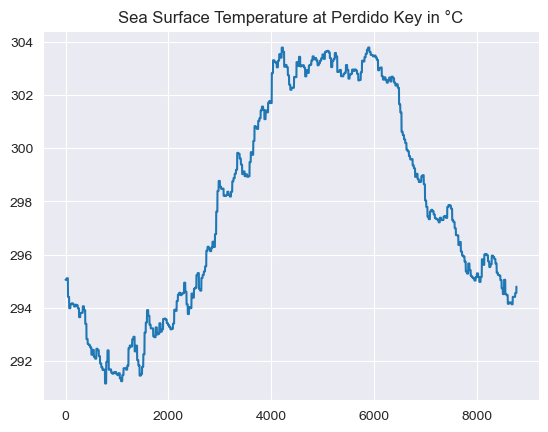

In [51]:
plt.plot(sst_data_time0_df["SST_PerdidoKey"])
plt.title("Sea Surface Temperature at Perdido Key in °C")
plt.show()

Note: If every value is -32767, it is very likely that langitude and longitude are switched or anything else is wrong with the coordinates. I assume that this value (which is almost the min of int16) should represent land areas.


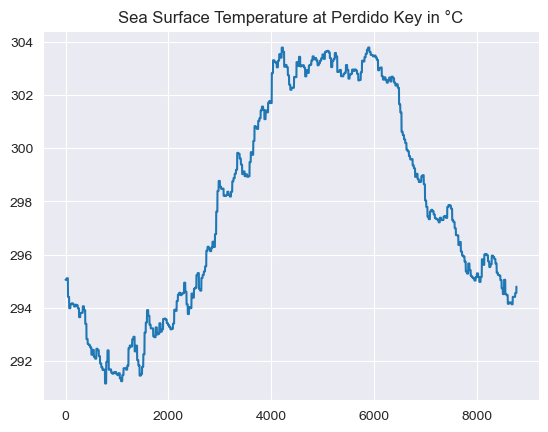

In [52]:
#In Fahrenheit

plt.plot(sst_data_time0_df["SST_PerdidoKey"])
plt.title("Sea Surface Temperature at Perdido Key in °C")
plt.show()